In [1]:
import pandas as pd
from utils import pca_utils, utils, pca_utils, plots
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [4]:
df_props = pd.read_csv("../output/df_props.csv")
df_props["dataApresentacao"] = pd.to_datetime(df_props["dataApresentacao"])

id_props_54 = set(
    df_props[
        (df_props["dataApresentacao"] >= datetime.datetime(2011, 2, 1))
        & (df_props["dataApresentacao"] <= datetime.datetime(2015, 1, 31))
    ]["id"]
)
id_props_55 = set(
    df_props[
        (df_props["dataApresentacao"] >= datetime.datetime(2015, 2, 1))
        & (df_props["dataApresentacao"] <= datetime.datetime(2019, 1, 31))
    ]["id"]
)
id_props_56 = set(
    df_props[
        (df_props["dataApresentacao"] >= datetime.datetime(2019, 2, 1))
        & (df_props["dataApresentacao"] <= datetime.datetime(2023, 1, 31))
    ]["id"]
)
id_props_57 = set(
    df_props[df_props["dataApresentacao"] >= datetime.datetime(2023, 2, 1)]["id"]
)

C:\Users\caca_\AppData\Local\Temp\ipykernel_23728\484636664.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_props = pd.read_csv("../output/df_props.csv")


In [3]:
df_props.groupby(df_props['dataApresentacao'].dt.year)['id'].count()


dataApresentacao
2011    33653
2012    23390
2013    29537
2014    16811
2015    39243
2016    23731
2017    32358
2018    18395
2019    41219
2020    26485
2021    39926
2022    26844
2023    62564
2024    32198
Name: id, dtype: int64

In [5]:
df_authors = pd.read_csv("../output/df_authors.csv")

df_authors["id_dep"] = df_authors["uri"].apply(lambda x: str(x).split("/")[-1])


df_topics_raw = pd.read_csv("../output/df_topics.csv")
df_topics = df_topics_raw.join(pd.get_dummies(df_topics_raw["tema"]))
df_topics = df_topics.loc[:, "id_prop":]

# tEMAS - GERAIS
df_authors_topic = (
    df_authors[["id_prop", "id_dep"]]
    .merge(df_topics)
    .loc[:, "id_dep":]
    .groupby("id_dep")
    .sum()
    .reset_index()
)
df_authors_topic.set_index("id_dep", inplace=True)
df_authors_topic = df_authors_topic.iloc[:-1, :]  # remove nan idenx

#  tEMAS - 54
df_authors_topic_54 = (
    df_authors[df_authors["id_prop"].isin(id_props_54)][["id_prop", "id_dep"]]
    .merge(df_topics)
    .loc[:, "id_dep":]
    .groupby("id_dep")
    .sum()
    .reset_index()
)
df_authors_topic_54.set_index("id_dep", inplace=True)
df_authors_topic_54 = df_authors_topic_54.iloc[:-1, :]  # remove nan idenx

#  tEMAS - 55
df_authors_topic_55 = (
    df_authors[df_authors["id_prop"].isin(id_props_55)][["id_prop", "id_dep"]]
    .merge(df_topics)
    .loc[:, "id_dep":]
    .groupby("id_dep")
    .sum()
    .reset_index()
)
df_authors_topic_55.set_index("id_dep", inplace=True)
df_authors_topic_55 = df_authors_topic_55.iloc[:-1, :]  # remove nan idenx
#  tEMAS - 56
df_authors_topic_56 = (
    df_authors[df_authors["id_prop"].isin(id_props_56)][["id_prop", "id_dep"]]
    .merge(df_topics)
    .loc[:, "id_dep":]
    .groupby("id_dep")
    .sum()
    .reset_index()
)
df_authors_topic_56.set_index("id_dep", inplace=True)
df_authors_topic_56 = df_authors_topic_56.iloc[:-1, :]  # remove nan idenx


# tEMAS - 57
df_authors_topic_57 = (
    df_authors[df_authors["id_prop"].isin(id_props_57)][["id_prop", "id_dep"]]
    .merge(df_topics)
    .loc[:, "id_dep":]
    .groupby("id_dep")
    .sum()
    .reset_index()
)
df_authors_topic_57.set_index("id_dep", inplace=True)
df_authors_topic_57 = df_authors_topic_57.iloc[:-1, :]  # remove nan idenx



# temas

In [97]:
def calculate_theil_entropy(row):
    total = row.sum()  # Total of values in the row
    mean = total / len(row)  # Mean value in the row
    n = len(row)

    entropy = 0
    for r in row:
        if r and r > 0:  # Avoid division by zero
            share = r / total
            entropy += share * np.log(1 / share)

    return 1 - (1 / np.log(n)) * entropy  # Normalize by number of elements


df_authors_topic["theil"] = [
    calculate_theil_entropy(row) for _, row in df_authors_topic.iterrows()
]
df_authors_topic_54["theil"] = [
    calculate_theil_entropy(row) for _, row in df_authors_topic_54.iterrows()
]
df_authors_topic_55["theil"] = [
    calculate_theil_entropy(row) for _, row in df_authors_topic_55.iterrows()
]
df_authors_topic_56["theil"] = [
    calculate_theil_entropy(row) for _, row in df_authors_topic_56.iterrows()
]
df_authors_topic_57["theil"] = [
    calculate_theil_entropy(row) for _, row in df_authors_topic_57.iterrows()
]

In [98]:
[
    df_authors_topic["theil"].mean(),
    df_authors_topic_54["theil"].mean(),
    df_authors_topic_55["theil"].mean(),
    df_authors_topic_56["theil"].mean(),
    df_authors_topic_57["theil"].mean(),
]

[0.4097977276169593,
 0.4997460948164016,
 0.5085846943067212,
 0.3487720723121221,
 0.286597507561026]

# atividade

In [99]:
def normalize_minmax(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

In [100]:
df_activity = (
    df_authors[["id_prop", "id_dep"]]
    .groupby("id_dep")
    .count()
    .rename({"id_prop": "n_props"}, axis=1)
)
df_activity = df_activity.iloc[:-1, :]  # remove nan id
df_activity["norm_freq"] = normalize_minmax(df_activity["n_props"])
df_activity["n_props_log"] = np.log(df_activity["n_props"])
df_activity["norm_props_log"] = normalize_minmax(df_activity["n_props_log"])

# ACTIVITY - 54
df_activity_54 = (
    df_authors[df_authors["id_prop"].isin(id_props_54)][["id_prop", "id_dep"]]
    .groupby("id_dep")
    .count()
    .rename({"id_prop": "n_props"}, axis=1)
)
df_activity_54 = df_activity_54.iloc[:-1, :]  # remove nan id
df_activity_54["norm_freq"] = normalize_minmax(df_activity_54["n_props"])
df_activity_54["n_props_log"] = np.log(df_activity_54["n_props"])
df_activity_54["norm_props_log"] = normalize_minmax(df_activity_54["n_props_log"])

# ACTIVITY - 55
df_activity_55 = (
    df_authors[df_authors["id_prop"].isin(id_props_55)][["id_prop", "id_dep"]]
    .groupby("id_dep")
    .count()
    .rename({"id_prop": "n_props"}, axis=1)
)
df_activity_55 = df_activity_55.iloc[:-1, :]  # remove nan id
df_activity_55["norm_freq"] = normalize_minmax(df_activity_55["n_props"])
df_activity_55["n_props_log"] = np.log(df_activity_55["n_props"])
df_activity_55["norm_props_log"] = normalize_minmax(df_activity_55["n_props_log"])

# ACTIVITY - 56
df_activity_56 = (
    df_authors[df_authors["id_prop"].isin(id_props_56)][["id_prop", "id_dep"]]
    .groupby("id_dep")
    .count()
    .rename({"id_prop": "n_props"}, axis=1)
)
df_activity_56 = df_activity_56.iloc[:-1, :]  # remove nan id
df_activity_56["norm_freq"] = normalize_minmax(df_activity_56["n_props"])
df_activity_56["n_props_log"] = np.log(df_activity_56["n_props"])
df_activity_56["norm_props_log"] = normalize_minmax(df_activity_56["n_props_log"])


# ACTIVITY - 57
df_activity_57 = (
    df_authors[df_authors["id_prop"].isin(id_props_57)][["id_prop", "id_dep"]]
    .groupby("id_dep")
    .count()
    .rename({"id_prop": "n_props"}, axis=1)
)
df_activity_57 = df_activity_57.iloc[:-1, :]  # remove nan id
df_activity_57["norm_freq"] = normalize_minmax(df_activity_57["n_props"])
df_activity_57["n_props_log"] = np.log(df_activity_57["n_props"])
df_activity_57["norm_props_log"] = normalize_minmax(df_activity_57["n_props_log"])

# abrangencia

In [101]:
df_abrang = (
    df_authors.merge(df_locals, on="id_prop")[["id_dep", "clf"]]
    .groupby("id_dep")
    .mean("clf")
    .rename({"clf": "percent_national"}, axis=1)
)

# 54
df_abrang_54 = (
    df_authors[df_authors["id_prop"].isin(id_props_54)]
    .merge(df_locals, on="id_prop")[["id_dep", "clf"]]
    .groupby("id_dep")
    .mean("clf")
    .rename({"clf": "percent_national"}, axis=1)
)
# 55
df_abrang_55 = (
    df_authors[df_authors["id_prop"].isin(id_props_55)]
    .merge(df_locals, on="id_prop")[["id_dep", "clf"]]
    .groupby("id_dep")
    .mean("clf")
    .rename({"clf": "percent_national"}, axis=1)
)
# 56
df_abrang_56 = (
    df_authors[df_authors["id_prop"].isin(id_props_56)]
    .merge(df_locals, on="id_prop")[["id_dep", "clf"]]
    .groupby("id_dep")
    .mean("clf")
    .rename({"clf": "percent_national"}, axis=1)
)

# 57
df_abrang_57 = (
    df_authors[df_authors["id_prop"].isin(id_props_57)]
    .merge(df_locals, on="id_prop")[["id_dep", "clf"]]
    .groupby("id_dep")
    .mean("clf")
    .rename({"clf": "percent_national"}, axis=1)
)

# merge

In [102]:
import matplotlib.pyplot as plt

In [103]:
df_merge = df_authors_topic.join(df_activity).join(df_abrang).fillna(0)
df_merge_54 = df_authors_topic_54.join(df_activity_54).join(df_abrang_54).fillna(0)
df_merge_55 = df_authors_topic_55.join(df_activity_55).join(df_abrang_55).fillna(0)
df_merge_56 = df_authors_topic_56.join(df_activity_56).join(df_abrang_56).fillna(0)
df_merge_57 = df_authors_topic_57.join(df_activity_57).join(df_abrang_57).fillna(0)

# Cluster

In [104]:
from utils import utils

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

In [105]:
df_merge["legislatura"] = "Todas"
df_merge_54["legislatura"] = "54ª"
df_merge_55["legislatura"] = "55ª"
df_merge_56["legislatura"] = "56ª"
df_merge_57["legislatura"] = "57ª"

# MODEL
x_label = "theil"
y_label = "norm_props_log"
z_label = "percent_national"

df = df_merge[[x_label, y_label, z_label]]
gmm = GaussianMixture(n_components=5, random_state=0).fit(df)

df_merge["gmm_cluster"] = gmm.predict(df)
df_merge_54["gmm_cluster"] = gmm.predict(df_merge_54[[x_label, y_label, z_label]])
df_merge_55["gmm_cluster"] = gmm.predict(df_merge_55[[x_label, y_label, z_label]])
df_merge_56["gmm_cluster"] = gmm.predict(df_merge_56[[x_label, y_label, z_label]])
df_merge_57["gmm_cluster"] = gmm.predict(df_merge_57[[x_label, y_label, z_label]])

In [106]:
df_final = pd.concat([df_merge, df_merge_54, df_merge_55, df_merge_56, df_merge_57])

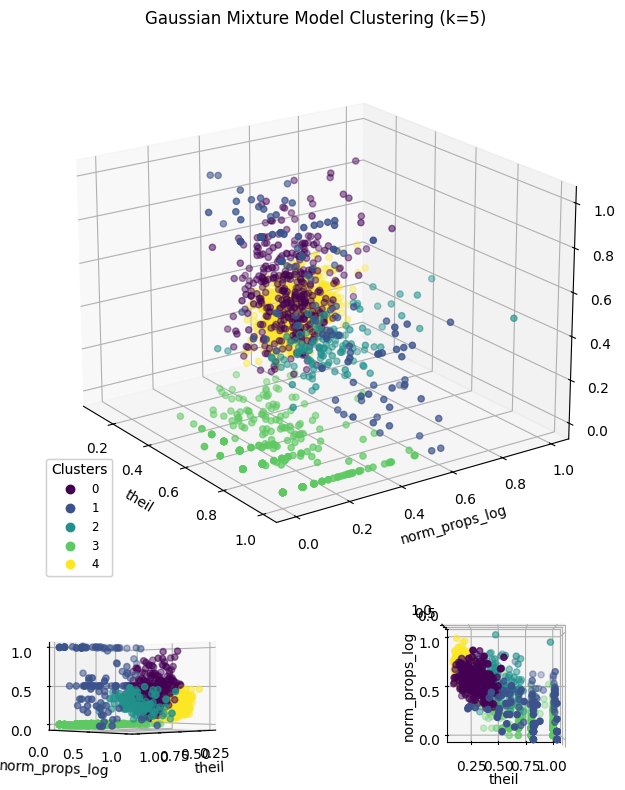

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_label = "theil"
y_label = "norm_props_log"
z_label = "percent_national"
k_value = 5
eps = 0.1
min_samples = 5

unique_clusters = range(0, k_value)

# Create figure and axes for side-by-side main plots and subplots
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(2, 4, height_ratios=[3, 1], width_ratios=[1, 1, 1, 1]) 

# --- GMM Plots ---
# Main plot
ax4 = fig.add_subplot(gs[0, 2:4], projection='3d')
scatter = ax4.scatter(df_merge[x_label], df_merge[y_label], df_merge[z_label], c=df_merge["gmm_cluster"], cmap='viridis', label=f'GMM (k={k_value})')
ax4.set_xlabel(x_label)
ax4.set_ylabel(y_label)
ax4.set_zlabel(z_label)
# Create a custom legend
legend2 = ax4.legend(*scatter.legend_elements(),
                loc="lower left", title="Clusters", fontsize="small")
ax4.add_artist(legend2)  # Add the legend back to the axes

ax4.view_init(elev=20, azim=-35)
ax4.set_title(f'Gaussian Mixture Model Clustering (k={k_value})')

# Mini plots
for i in range(2):
    ax = fig.add_subplot(gs[1, i+2], projection='3d')
    ax.scatter(df_merge[x_label], df_merge[y_label], df_merge[z_label], c=df_merge["gmm_cluster"], cmap='viridis')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    # ax.set_zlabel(z_label)
    ax.view_init(elev=[0, 90][i], azim=[45, -90][i])

plt.tight_layout()
plt.show()

In [108]:
df_final.groupby('legislatura').mean()[[x_label, y_label, z_label]]

,theil,norm_props_log,percent_national
legislatura,,,
54ª,0.499746,0.508310,0.314030
55ª,0.508585,0.490058,0.246990
56ª,0.348772,0.611505,0.229274
57ª,0.286598,0.596885,0.218873
Todas,0.409798,0.492505,0.250004


In [109]:
df_final.to_excel('df_resultado_54_57_legislaturas.xlsx')